# TP-4: CBOW Model for Word Embeddings

### 1. Split sentences

In [1]:
txt = """Nowaday, Artificial intelligence is changing the world. Many people use AI tools every day. 
Students learn new skills through technology. Python is a popular language for data science. 
Machine learning helps solve real problems. The future of AI is exciting. Technology is evolving faster than ever before. New tools are created every year to make life easier. 
Students around the world rely on computers to learn and explore new ideas. Many universities now use 
online platforms for teaching. Artificial intelligence has become an important part of modern education. 
People use AI to translate languages, summarize articles, and solve difficult problems. Data science is 
helping companies make better decisions. Machine learning models can detect patterns that humans cannot see. 
Researchers train neural networks on huge datasets. These models are used in healthcare, agriculture, and 
transportation. Farmers use drones to monitor crops. Doctors use AI systems to analyze medical images. 
Self-driving cars rely on sensors and algorithms to navigate safely. Robotics is another field that is 
growing quickly. Robots can perform tasks that are dangerous for humans. Some factories use robots to 
assemble products faster and more accurately. The future of technology is full of possibilities. People 
must also learn how to use technology responsibly. Cybersecurity is becoming more important every year. 
Users need to protect their data from online threats. Strong passwords and two-factor authentication help 
improve security. Digital literacy is an essential skill in the modern world. Children should learn how 
technology works from a young age. Reading, writing, and coding are becoming equally important. Education 
systems must adapt to prepare students for future jobs. Collaboration between humans and AI will define the 
next decade. Technology can support creativity and innovation. With the right tools, anyone can build new 
solutions to global challenges. The world is changing, and people must continue learning every day.
"""

sentences = [sentence.strip() for sentence in txt.split('.') if sentence]

In [2]:
for i, sentence in enumerate(sentences):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: Nowaday, Artificial intelligence is changing the world
Sentence 2: Many people use AI tools every day
Sentence 3: Students learn new skills through technology
Sentence 4: Python is a popular language for data science
Sentence 5: Machine learning helps solve real problems
Sentence 6: The future of AI is exciting
Sentence 7: Technology is evolving faster than ever before
Sentence 8: New tools are created every year to make life easier
Sentence 9: Students around the world rely on computers to learn and explore new ideas
Sentence 10: Many universities now use 
online platforms for teaching
Sentence 11: Artificial intelligence has become an important part of modern education
Sentence 12: People use AI to translate languages, summarize articles, and solve difficult problems
Sentence 13: Data science is 
helping companies make better decisions
Sentence 14: Machine learning models can detect patterns that humans cannot see
Sentence 15: Researchers train neural networks on huge dat

### 2. Make vocabulary

In [3]:
import nltk
from collections import Counter
from nltk.corpus import stopwords

nltk.download('stopwords')

all_words = []

for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    all_words.extend(words)

# remove punctuation and stop words from all_words
all_words = [word for word in all_words if word.isalnum()]
stop_words = set(stopwords.words('english'))
all_words = [word for word in all_words if word not in stop_words]

vocab = Counter(all_words)
vocab = dict(sorted(vocab.items()))
vocab_unique = list(vocab.keys())
vocab_unique

[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['accurately',
 'adapt',
 'age',
 'agriculture',
 'ai',
 'algorithms',
 'also',
 'analyze',
 'another',
 'anyone',
 'around',
 'articles',
 'artificial',
 'assemble',
 'authentication',
 'become',
 'becoming',
 'better',
 'build',
 'cars',
 'challenges',
 'changing',
 'children',
 'coding',
 'collaboration',
 'companies',
 'computers',
 'continue',
 'created',
 'creativity',
 'crops',
 'cybersecurity',
 'dangerous',
 'data',
 'datasets',
 'day',
 'decade',
 'decisions',
 'define',
 'detect',
 'difficult',
 'digital',
 'doctors',
 'drones',
 'easier',
 'education',
 'equally',
 'essential',
 'ever',
 'every',
 'evolving',
 'exciting',
 'explore',
 'factories',
 'farmers',
 'faster',
 'field',
 'full',
 'future',
 'global',
 'growing',
 'healthcare',
 'help',
 'helping',
 'helps',
 'huge',
 'humans',
 'ideas',
 'images',
 'important',
 'improve',
 'innovation',
 'intelligence',
 'jobs',
 'language',
 'languages',
 'learn',
 'learning',
 'life',
 'literacy',
 'machine',
 'make',
 'many',


### 3. One-hot encode

In [4]:
def word_to_index(vocab, word):
    return vocab.index(word)

def index_to_word(vocab, index):
    return vocab[index]

vocab_size = len(vocab_unique)
print(f"Vocabulary Size: {vocab_size}")

def one_hot_encode(word):
    vector = [0] * vocab_size
    index = word_to_index(vocab_unique, word)
    vector[index] = 1
    return vector

Vocabulary Size: 149


### 4. Prepare training data

In [5]:
#  Make (context → target) pairs.
window_size = 2
data = []
for sentence in sentences:
    words = nltk.word_tokenize(sentence.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    for i, target_word in enumerate(words):
        context_words = []
        for j in range(i - window_size, i + window_size + 1):
            if j != i and 0 <= j < len(words):
                context_words.append(words[j])
        if len(context_words) == 2 * window_size:
            data.append((context_words, target_word))
            
print("Sample (context → target) pairs:")
for i in range(3):
    context, target = data[i]
    print(f"Context: {context} -> Target: {target}")

Sample (context → target) pairs:
Context: ['nowaday', 'artificial', 'changing', 'world'] -> Target: intelligence
Context: ['many', 'people', 'ai', 'tools'] -> Target: use
Context: ['people', 'use', 'tools', 'every'] -> Target: ai


### 5. Model

In [6]:
from random import shuffle

shuffle(data)
train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]

import numpy as np
class Word2Vec:
    def __init__(self, vocab_size, embedding_dim):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.W1 = np.random.rand(vocab_size, embedding_dim)
        self.W2 = np.random.rand(embedding_dim, vocab_size)
        self.loss = []
    
    # forward pass
    def forward(self, x):
        self.h = np.dot(x, self.W1)
        self.u = np.dot(self.h, self.W2)
        self.y_pred = self.softmax(self.u)
        return self.y_pred
    
    # calculate loss
    def compute_loss(self, y_true, y_pred):
        loss = -np.sum(y_true * np.log(y_pred + 1e-9))
        self.loss.append(loss)
        return loss
    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum(axis=0)
    
    def update_weights(self, x, y_true, learning_rate):
        # backward pass
        e = self.y_pred - y_true
        dW2 = np.outer(self.h, e)
        dW1 = np.outer(x, np.dot(self.W2, e))
        
        # update weights
        self.W1 -= learning_rate * dW1
        self.W2 -= learning_rate * dW2
        
    def train(self, data, epochs, learning_rate):
        for epoch in range(epochs):
            total_loss = 0
            for context_words, target_word in data:
                x = np.zeros(self.vocab_size)
                for word in context_words:
                    x += one_hot_encode(word)
                x = x / len(context_words)
                
                y_true = one_hot_encode(target_word)
                
                y_pred = self.forward(x)
                total_loss += self.compute_loss(y_true, y_pred)
                
                self.update_weights(x, y_true, learning_rate)
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}, Loss: {total_loss/len(data)}")
                print(f"Sample prediction after epoch {epoch+1}:")
                sample_context, sample_target = data[0]
                predicted_word = self.predict(sample_context)
                print(f"Context: {sample_context} -> Predicted: {predicted_word}, Actual: {sample_target}")
                
    def get_embedding(self, word):
        index = word_to_index(vocab_unique, word)
        return self.W1[index] 
    
    def predict(self, context_words):
        x = np.zeros(self.vocab_size)
        for word in context_words:
            x += one_hot_encode(word)
        x = x / len(context_words)
        
        y_pred = self.forward(x)
        predicted_index = np.argmax(y_pred)
        return index_to_word(vocab_unique, predicted_index)
    
    def print_all_tests(self, data):
        for context_words, target_word in data:
            predicted_word = self.predict(context_words)
            print(f"Context: {context_words} -> Predicted: {predicted_word}, Actual: {target_word}")

In [7]:
embedding_dim = 10
model = Word2Vec(vocab_size, embedding_dim)
learning_rate = 0.001
epochs = 20000
model.train(train_data, epochs, learning_rate)

Epoch 100, Loss: 4.790686313904264
Sample prediction after epoch 100:
Context: ['tools', 'anyone', 'new', 'solutions'] -> Predicted: ai, Actual: build
Epoch 200, Loss: 4.565087954655487
Sample prediction after epoch 200:
Context: ['tools', 'anyone', 'new', 'solutions'] -> Predicted: ai, Actual: build
Epoch 300, Loss: 4.386288664778224
Sample prediction after epoch 300:
Context: ['tools', 'anyone', 'new', 'solutions'] -> Predicted: ai, Actual: build
Epoch 400, Loss: 4.23965335928855
Sample prediction after epoch 400:
Context: ['tools', 'anyone', 'new', 'solutions'] -> Predicted: ai, Actual: build
Epoch 500, Loss: 4.114273503565619
Sample prediction after epoch 500:
Context: ['tools', 'anyone', 'new', 'solutions'] -> Predicted: ai, Actual: build
Epoch 600, Loss: 4.003103264346886
Sample prediction after epoch 600:
Context: ['tools', 'anyone', 'new', 'solutions'] -> Predicted: ai, Actual: build
Epoch 700, Loss: 3.9012781278141544
Sample prediction after epoch 700:
Context: ['tools', 'anyo

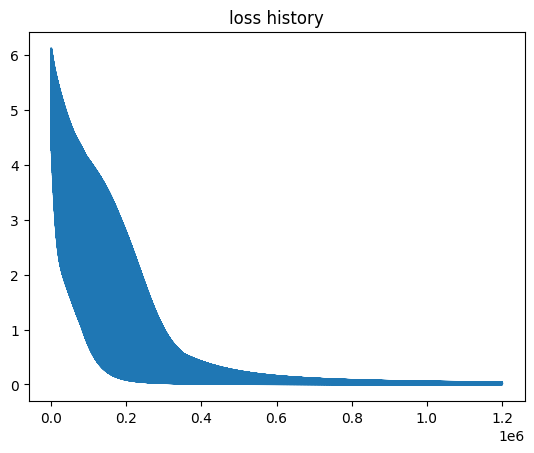

In [8]:
import matplotlib.pyplot as plt

loss = model.loss
plt.plot(loss)
plt.title('loss history')
plt.show()

In [9]:
model.print_all_tests(test_data)

Context: ['universities', 'use', 'platforms', 'teaching'] -> Predicted: ai, Actual: online
Context: ['passwords', 'authentication', 'improve', 'security'] -> Predicted: authentication, Actual: help
Context: ['cybersecurity', 'becoming', 'every', 'year'] -> Predicted: make, Actual: important
Context: ['farmers', 'use', 'monitor', 'crops'] -> Predicted: ai, Actual: drones
Context: ['learning', 'helps', 'real', 'problems'] -> Predicted: helps, Actual: solve
Context: ['computers', 'learn', 'new', 'ideas'] -> Predicted: use, Actual: explore
Context: ['nowaday', 'artificial', 'changing', 'world'] -> Predicted: rely, Actual: intelligence
Context: ['people', 'must', 'learn', 'use'] -> Predicted: ai, Actual: also
Context: ['summarize', 'articles', 'difficult', 'problems'] -> Predicted: articles, Actual: solve
Context: ['factories', 'use', 'assemble', 'products'] -> Predicted: assemble, Actual: robots
Context: ['world', 'changing', 'must', 'continue'] -> Predicted: prepare, Actual: people
Contex

## with gemsim

In [10]:
from gensim.models import Word2Vec

# 1) Read text from file
with open("text.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

In [11]:
# 2) Very simple sentence + word splitting
# Split by '.' into sentences
raw_sentences = [sent.strip() for sent in text.split('.') if sent.strip()]

# Split each sentence into list of words (tokens)
sentences = [sent.split() for sent in raw_sentences]

print("Number of sentences:", len(sentences))
print("First sentence tokens:", sentences[0])

Number of sentences: 35
First sentence tokens: ['nowaday,', 'artificial', 'intelligence', 'is', 'changing', 'the', 'world']


In [12]:
# 3) Train CBOW model  (sg=0 → CBOW, sg=1 → Skip-gram)
model = Word2Vec(
    sentences,
    vector_size=50,   # embedding_dim
    window=2,         # context window size
    min_count=1,      # keep all words (no frequency filter)
    workers=4,        # number of CPU cores to use
    sg=0              # 0 = CBOW, 1 = Skip-gram
)

In [13]:
# 4) Check vocabulary
print("\nVocabulary words:")
print(list(model.wv.index_to_key))


Vocabulary words:
['to', 'is', 'and', 'the', 'use', 'technology', 'ai', 'can', 'are', 'of', 'for', 'new', 'learn', 'every', 'people', 'world', 'must', 'humans', 'that', 'important', 'on', 'future', 'learning', 'data', 'students', 'from', 'becoming', 'how', 'more', 'robots', 'systems', 'in', 'models', 'education', 'modern', 'an', 'online', 'rely', 'make', 'year', 'faster', 'problems', 'solve', 'machine', 'science', 'a', 'day', 'tools', 'many', 'intelligence', 'artificial', 'continue', 'changing,', 'challenges', 'global', 'solutions', 'build', 'anyone', 'tools,', 'right', 'with', 'innovation', 'creativity', 'support', 'decade', 'next', 'define', 'will', 'between', 'collaboration', 'jobs', 'prepare', 'adapt', 'equally', 'coding', 'writing,', 'reading,', 'age', 'young', 'works', 'should', 'children', 'skill', 'essential', 'literacy', 'digital', 'security', 'improve', 'help', 'authentication', 'two-factor', 'passwords', 'strong', 'threats', 'their', 'protect', 'need', 'users', 'cybersecuri

In [14]:
# 5) Get embedding vector of a word
word = "technology"
if word in model.wv:
    print(f"\nEmbedding for '{word}':")
    print(model.wv[word])
else:
    print(f"\n'{word}' is not in the vocabulary")


Embedding for 'technology':
[ 2.8487649e-03 -5.2632233e-03 -1.4160027e-02 -1.5618892e-02
 -1.8200342e-02 -1.1949223e-02 -3.6423178e-03 -8.5707959e-03
 -1.2930848e-02 -7.4551199e-03  8.5713109e-03 -7.4659050e-03
  1.6738618e-02  3.0925849e-03 -1.4437929e-02  1.8921053e-02
  1.5217638e-02  1.0974181e-02 -1.3714542e-02  1.1606625e-02
  8.0460263e-03  1.0354236e-02  8.5084205e-03  3.8863807e-03
 -6.3260351e-03  1.6743638e-02  1.9251615e-02  7.6097571e-03
 -5.7269493e-03 -1.5283977e-06  2.4994470e-03 -1.6901333e-02
 -1.6464738e-02 -4.5303485e-04  2.4901000e-03 -1.1480581e-02
 -9.4396984e-03 -1.4675984e-02  1.6704548e-02  2.1505068e-04
 -8.9616701e-03  1.1426354e-02  1.8349078e-02 -8.2044648e-03
  1.5990077e-02  1.0701603e-02  1.1712318e-02  1.0031736e-03
  1.6490610e-02 -1.4089510e-02]


In [15]:
# 6) Find similar words
if word in model.wv:
    print(f"\nMost similar words to '{word}':")
    for w, score in model.wv.most_similar(word):
        print(f"{w}  ->  {score:.4f}")


Most similar words to 'technology':
networks  ->  0.3520
many  ->  0.3210
through  ->  0.3121
every  ->  0.3075
next  ->  0.2862
has  ->  0.2857
jobs  ->  0.2765
humans  ->  0.2711
medical  ->  0.2651
companies  ->  0.2453


In [16]:
# 7) Save model (optional)
model.save("cbow_model_gensim.model")